In [28]:
source("./lib_DSD.r")

In [2]:
library(ggplot2)

In [12]:
file <- get.campbellsci_file("../../CloudStation/LoggerNet/CR6_SN1698_P_Size_2015_10_08_2015_11_11.dat")

In [30]:
file0 = file
data0 = data
DSD_df0 = DSD_df

In [31]:
file <- get.campbellsci_file("../../CloudStation/LoggerNet/CR6_SN1698_P_Size_2015_11_13_2015_11_20.dat")

In [52]:
file1 = file
data1 = data
DSD_df1 = DSD_df

In [53]:
file <- get.campbellsci_file("../../CloudStation/LoggerNet/CR6_SN1698_P_Size_2015_12_02_2015_12_22.dat")

In [56]:
file2 = file
data2 = data
DSD_df2 = DSD_df

In [58]:
file <- get.campbellsci_file("../../CloudStation/LoggerNet/CR6_SN1698_P_Size_2015_12_22_2016_01_03.dat")

In [62]:
file3 = file
data3 = data
DSD_df3 = DSD_df

In [ ]:
tabD <- rowMeans(get.classD())
DSD_perwidth <- 10**file
colnames(DSD_perwidth)[1:32] <- tabD
DSD <- get.DSD(file)
DSD_df <- as.data.frame(DSD_perwidth)
DSD_df$date_time <- as.POSIXct(row.names(DSD_df))
tabN <- get.tabN(DSD, tabD)
data <- get.sum_stats(DSD, tabD, tabN)

Warning message:
In raindrop_velocity(tabD): some drop diameters were larger than 7 mm

In [60]:
write.csv(data[c('date_time', 'rain_rate')], file="../../CloudStation/LoggerNet/CR6_SN1698_rain_rate_2015_12_22_2016_01_03.csv", row.names=FALSE)

In [72]:
file = file2
data = data2
DSD_df = DSD_df2

Saving 6.67 x 6.67 in image


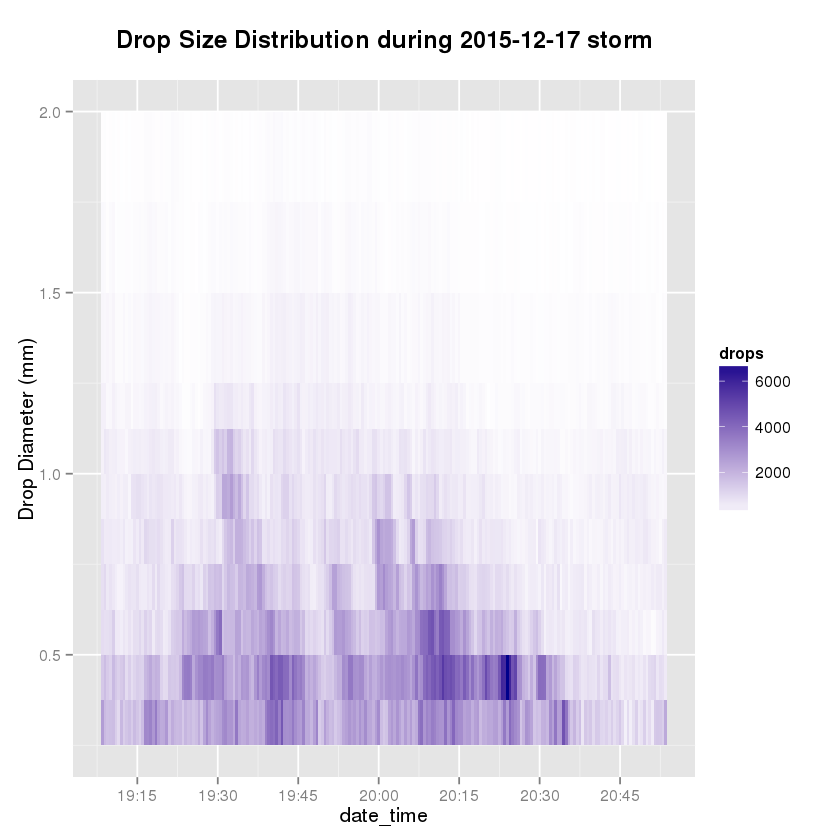

In [79]:
library(zoo)

width = 15 * 2
by = 15 * 2 
thresh = 8  # mm/hr

# storms have to last as long as width and have at least a width between them.

m = rollapply(zoo(data$rain_rate), width = width, by = by, FUN = mean, na.rm = FALSE, align = "left")
s = index(m[m > thresh])
t = s[rollapply(s, width = 2, by = 1, FUN = diff, na.rm = FALSE, align = "left") > 60*2*6]

for(i in t){
    storm.begin = s[s<i][1] #+ width/2
    storm.end = i + width*4
    if(is.na(storm.begin)){
        storm.begin <- storm.end-width/2}
    if((storm.end - storm.begin) > width){
    storm.DSD_df <- DSD_df[storm.begin:storm.end,]
    p = plot.DSD(storm.DSD_df, save_path='./output/')
    show(p)}
    s = s[s>i]
  }